In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Advanced Numerical Methods for ODEs

## Comet Orbits

The following program will solve for the position and energy of a comet. The function _orbit_ will use the following strategy:

1. Define the _gravrk_ function used by Runga-Kutta routines
2. Set the initial position and velocity of the comet
3. Set physical parameters (m, GM, etc)
4. Loop over desired number of steps using specified numerical method
    - Record position and energy for plotting
    - Calculate new position using:
        - Euler method, or
        - Euler-Cromer method, or
        - Fourth-order Runga-Kutta, or
        - Adaptive Runga-Kutta
5. Graph the trajectory of the comet
6. Graph the energy of the comet vs time

In [2]:
def orbit():
    ''' Computes the orbit of a comet around the sun using either Euler, Euler-Cromer, 
    fourth-order Runga-Kutta, or adaptive Runga-Kutta.
    '''
    
    # Set up configuration options and special features
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Un-comment the import lines when using .py scripts. Otherwise, call the functions from 
    # this notebook.
    
#     from nm4p.rk4 import rk4
#     from nm4p.rka import rka

    # Set initial position and velocity of the comet
    r0 = float(input('Enter initial radial distance (AU): '))
    v0 = float(input('Enter initial tangential velocity (AU/yr): '))
    r = np.array([r0, 0])
    v = np.array([0, v0])
    state = np.array([r[0], r[1], v[0], v[1]])
    
    # Set physical parameters
    GM = 4 * np.pi**2     # Grav const * mass of sun (au^3 / yr^2)
    mass = 1.0            # Mass of comet
    adaptErr = 1.0e-3     # Error parameter used by adaptive Runga-Kutta
    time = 0.0
    
    # Loop over desired number of steps using specified method
    nStep = int(input('Enter number of steps: '))
    tau = float(input('Enter time step (yr): '))
    numericalMethod = int(input('Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta'))
    rplot = np.empty(nStep)
    thplot = np.empty(nStep)
    tplot = np.empty(nStep)
    kinetic = np.empty(nStep)
    potential = np.empty(nStep)
    
    for istep in range(nStep):
        
        # Record position and energy for plotting
        rplot[istep] = np.linalg.norm(r)
        thplot[istep] = np.arctan2(r[0], r[1])
        tplot[istep] = time
        kinetic[istep] = 0.5 * mass * np.linalg.norm(v)**2
        potential[istep] = -GM * mass / np.linalg.norm(r)
        
        # Calculate new position using desired method
        if numericalMethod == 1:   # Euler
            accel = -GM * r / np.linalg.norm(r)**3
            r += tau * v
            v += tau * accel
            time += tau
        elif numericalMethod == 2: # Euler-Cromer
            accel = -GM * r / np.linalg.norm(r)**3
            v += tau * accel
            r += tau * v
            time += tau
        elif numericalMethod == 3: # Fourth-order Runga-Kutta
            state = rk4(state, time, tau, gravrk, GM)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
            time += tau
        else:
            [state, time, tau] = rka(state, time, tau, adaptErr, gravrk, GM)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
            
    # Graph the comet trajectory
    ax = plt.subplot(111, projection='polar')
    ax.plot(thplot, rplot, '+')
    ax.set_title('Distance from sun (AU)')
    ax.grid(True)
    plt.show()
        
    # Graph the energy of the comet vs time
    totalE = kinetic + potential
    plt.plot(tplot, kinetic, '-.', tplot, potential, '--', tplot, totalE, '-')
    plt.legend(['Kinetic', 'Potential', 'Total'])
    plt.xlabel('Time (yr)')
    plt.ylabel(r'Energy ($M AU^2/yr^2$)')
    plt.show()

In [3]:
def gravrk(s, t, GM):
    ''' gravrk function used by the Runga-Kutta routines.
    Returns the right-hand side of the Kepler ODE.
    Inputs
    ------
        s     State vector [r(1) r(2) v(1) v(2)]
        t     Time (not used)
        GM    Parameter G*M (gravitational const * solar mass)
    Outputs
    -------
        deriv Derivatives [dr(1)/dt dr(2)/dt dv(1)/dt dv(2)/dt]
    '''
    
    # Compute acceleration
    r = np.array(s[0], s[1])
    v = np.array(s[2], s[3])
    accel = -GM * r / np.linalg.norm(r)**3   # Gravitational acceleration
    
    # Return derivatives [dr(1)/dt dr(2)/dt dv(1)/dt dv(2)/dt]
    deriv = np.array(v[0], v[1], accel[0], accel[1])
    return deriv

In [4]:
def rk4(x, t, tau, derivsRK, param):
    ''' Runga-Kutta, fourth-order
    Inputs
    ------
        x = current value of dependent variable
        t = independent variable
        tau = step size
        derivsRK = right-hand side of ODE; derivsRK is the
            name of the function that returns dx/dt.
            Calling format is derivsRK (x, t, param)
        param = extra parameters passed to derivsRK
    Outputs
    -------
        xout = new value of x after a step of size tau
    '''
    
    half_tau = 0.5 * tau
    F1 = derivsRK(x, t, param)
    t_half = t + half_tau
    xtemp = x + half_tau * F1
    F2 = derivsRK(xtemp, t_half, param)
    xtemp = x + half_tau * F2
    F3 = derivsRK(xtemp, t_half, param)
    t_full = t + tau
    xtemp = x + tau * F3
    F4 = derivsRK(xtemp, t_full, param)
    xout = x + tau/6. * (F1 + F4 + 2 * (F2 + F3))
    return xout

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  6.28
Enter number of steps:  200
Enter time step (yr):  0.02
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 1


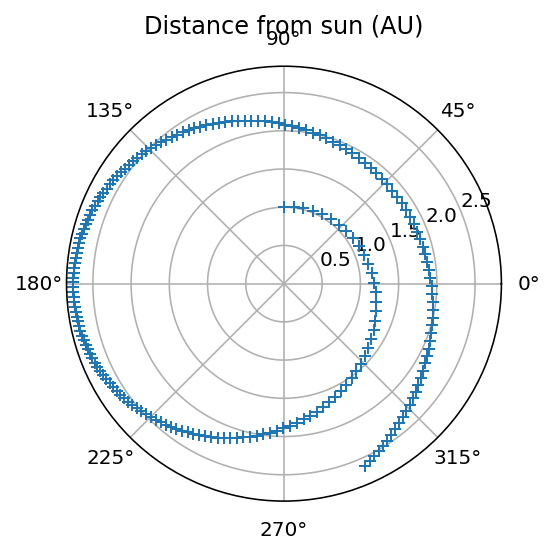

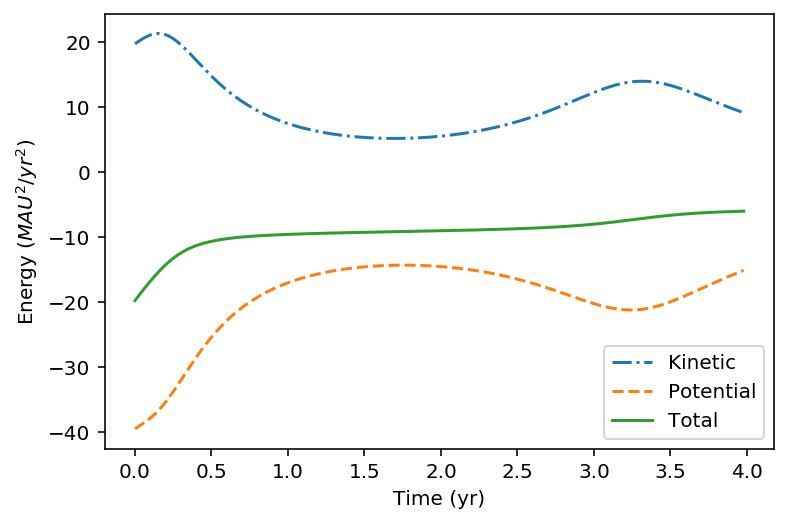

In [14]:
orbit()

Using Euler, the orbit spirals outward. From the energy graph, we can see that the total energy is increasing instead of remaining constant. Let's use Euler-Cromer instead and see what the results are.

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  6.28
Enter number of steps:  200
Enter time step (yr):  0.02
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


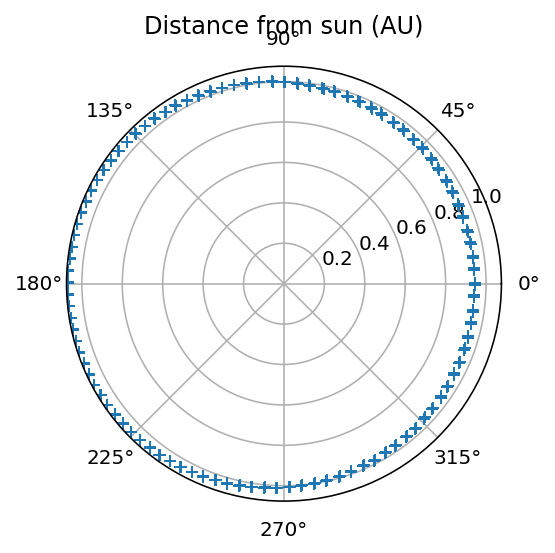

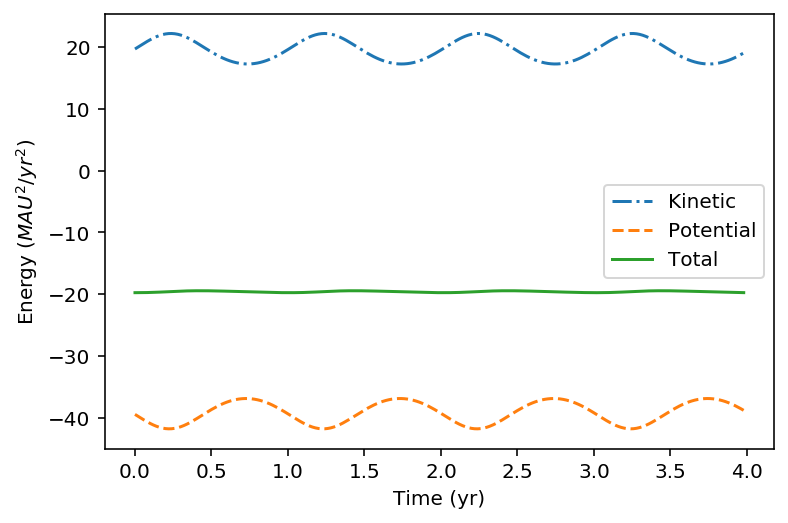

In [15]:
orbit()

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  3.14
Enter number of steps:  200
Enter time step (yr):  0.02
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


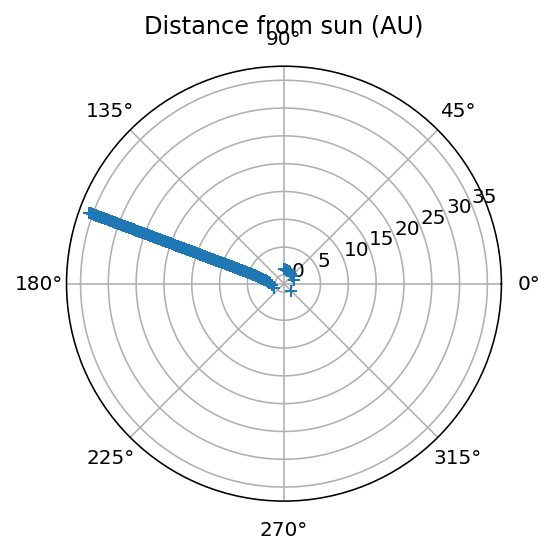

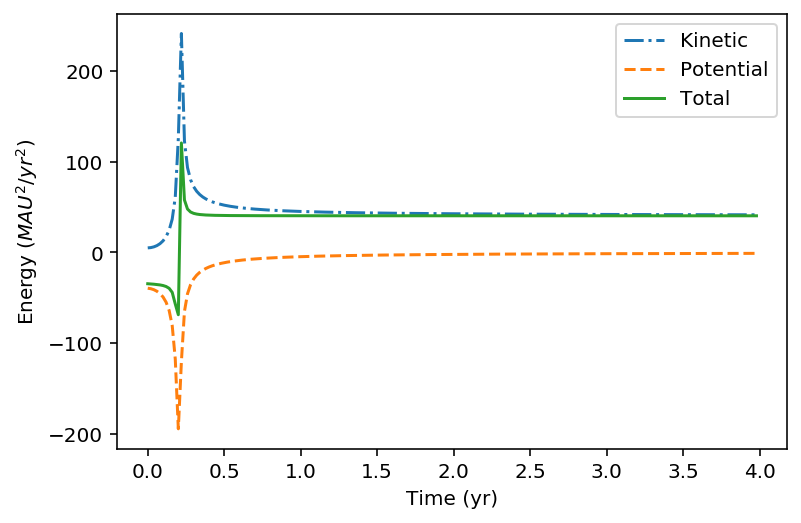

In [17]:
orbit()

This first result with Euler-Cromer is much better. Recall that the only difference between the Euler method and the Euler-Cromer method is that the velocity step is computed first, and this is used to update the position. We can see that the orbit is nearly circular, and total energy is conserved. 

The second iteration, a lower initial velocity is used, and due to numerical error, then energy becomes positive and the comet achieves escape velocity. Using a smaller time step should work, but it will create a higher-eccentricity orbit that this method has problems with. One may think that the problem is physical rather than numerical. This is where better approximations, such as Runga-Kutta methods come in.

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  3.14
Enter number of steps:  200
Enter time step (yr):  0.005
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


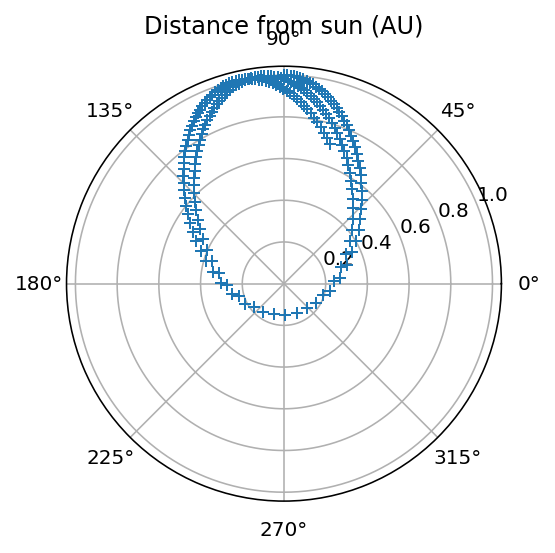

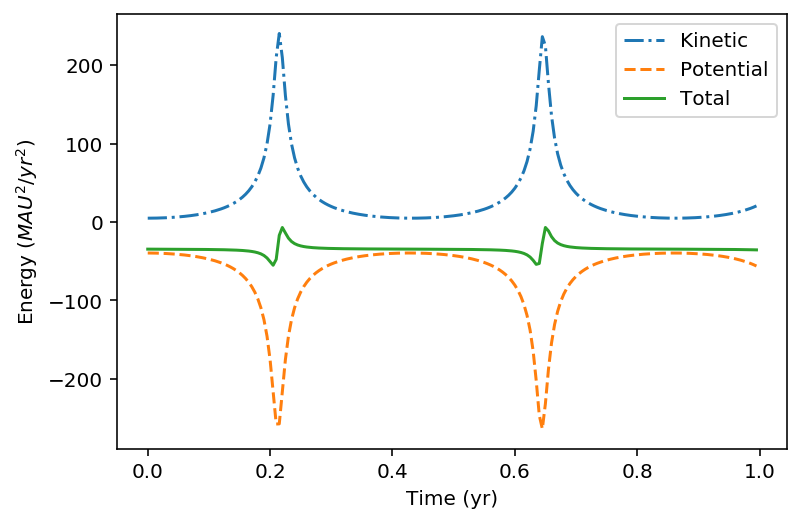

In [18]:
orbit()

## Exercise 1

Prove that is the earth lost all orbital velocity, that it would reach the sun in about 65 days.

In [47]:
G = 6.67e-11
M = 1.99e30
m = 5.972e24
r = 1.496e11

In [48]:
v0 = 0.
r0 = 1.496e11
tau = 1 # seconds
time = 0.
while r >= 1:
    a = -(G*m*M/r**2)/m
    v = v0 + tau * a
    r = r0 + tau * v
    v0 = v
    r0 = r
    time += tau

In [49]:
time * (1/3600) * (1/24)

64.56528935185185

The above code uses Euler-Cromer to update velocity and position for the earth that is initially stationary at 1 AU. The time step is 1 second, but the results were close when a time step of 1 hour was used.

## Exercise 3

Modify _orbit_ so that instead of running for a fixed number of time steps, the program stops when the satellite completes one orbit. Have the program compute the period, eccentricity, semimajor axis, and perihelion distance of the orbit.

In [68]:
def orbit_mod():
    ''' Computes the orbit of a comet around the sun using either Euler, Euler-Cromer, 
    fourth-order Runga-Kutta, or adaptive Runga-Kutta.
    '''
    
    # Set up configuration options and special features
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Un-comment the import lines when using .py scripts. Otherwise, call the functions from 
    # this notebook.
    
#     from nm4p.rk4 import rk4
#     from nm4p.rka import rka

    # Set initial position and velocity of the comet
    r0 = float(input('Enter initial radial distance (AU): '))
    v0 = float(input('Enter initial tangential velocity (AU/yr): '))
    r = np.array([r0, 0])
    v = np.array([0, v0])
    state = np.array([r[0], r[1], v[0], v[1]])
    
    # Set physical parameters
    GM = 4 * np.pi**2     # Grav const * mass of sun (au^3 / yr^2)
    mass = 1.0            # Mass of comet
    adaptErr = 1.0e-3     # Error parameter used by adaptive Runga-Kutta
    time = 0.0
    
    # Loop over desired number of steps using specified method
    tau = float(input('Enter time step (yr): '))
    numericalMethod = int(input('Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta'))
    rplot = []
    thplot = []
    tplot = []
    kinetic = []
    potential = []
    theta0 = np.arctan2(r0, 0)
    flag = True
    
    while flag:
        
        # Record position and energy for plotting
        rplot.append(np.linalg.norm(r))
        thplot.append(np.arctan2(r[0], r[1]))
        tplot.append(time)
        kinetic.append(0.5 * mass * np.linalg.norm(v)**2)
        potential.append(-GM * mass / np.linalg.norm(r))
        
        # Calculate new position using desired method
        if numericalMethod == 1:   # Euler
            accel = -GM * r / np.linalg.norm(r)**3
            r += tau * v
            v += tau * accel
            time += tau
        elif numericalMethod == 2: # Euler-Cromer
            accel = -GM * r / np.linalg.norm(r)**3
            v += tau * accel
            r += tau * v
            time += tau
        elif numericalMethod == 3: # Fourth-order Runga-Kutta
            state = rk4(state, time, tau, gravrk, GM)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
            time += tau
        else:
            [state, time, tau] = rka(state, time, tau, adaptErr, gravrk, GM)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
        
        if time > 100 * tau and np.abs(theta0 - thplot[-1])*180/np.pi < 1:
            flag = False
        
        if time > 10000 * tau:
            print('Solution diverging. Stopping.')
            flag = False
            
    # Graph the comet trajectory
    ax = plt.subplot(111, projection='polar')
    ax.plot(thplot, rplot, '+')
    ax.plot(thplot[0], rplot[0], 'ro')
    ax.set_title('Distance from sun (AU)')
    ax.grid(True)
    plt.show()
        
    # Graph the energy of the comet vs time
    totalE = np.array(kinetic) + np.array(potential)
    plt.plot(tplot, kinetic, '-.', label='Kinetic')
    plt.plot(tplot, potential, '--', label='Potential')
    plt.plot(tplot, totalE, '-', label='Total')
    plt.legend()
    plt.xlabel('Time (yr)')
    plt.ylabel(r'Energy ($M AU^2/yr^2$)')
    plt.show()
    
    #b = rplot[np.abs(45 - np.array(thplot)*180/np.pi).argmin()]*np.sin(thplot[np.abs(45 - np.array(thplot)).argmin()])
    #a1 = rplot[thplot==90.]
    #a2 = rplot[np.abs(-90 - np.array(thplot)*180/np.pi).argmin()]
    a1 = max(rplot)
    a2 = min(rplot)
    a = (a1 + a2) / 2
    b = np.sqrt(a1 * a2)
    e = np.sqrt(1 - b**2/a**2)
    period_calc = np.sqrt(4*np.pi**2*a**3/(GM))
    
    print(f'Semimajor axis: {a:.2f} (AU)')
    print(f'Perihelion from data: {min(rplot):.2f} (AU)')
    print(f'Perihelion from calc: {(1 - e)*a:.2f} (AU)')
    print(f'Period from data: {tplot[-1]:.2f} years')
    print(f'Period from calc: {period_calc:.2f}')
    
    return rplot, thplot

Enter initial radial distance (AU):  2
Enter initial tangential velocity (AU/yr):  3.5
Enter time step (yr):  0.005
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


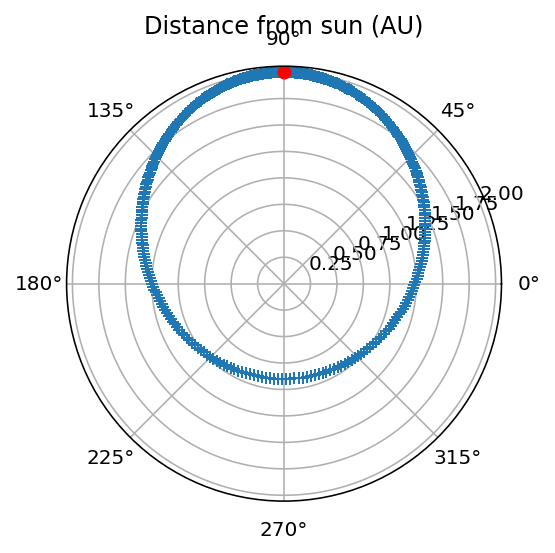

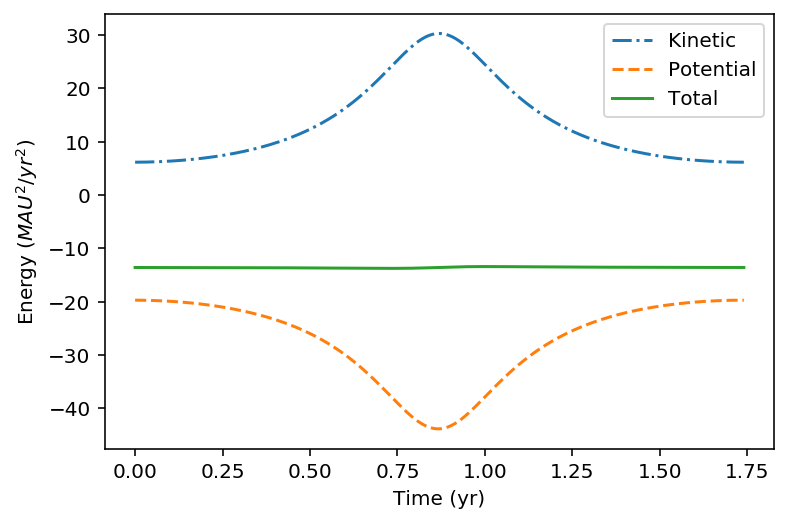

Semimajor axis: 1.45 (AU)
Perihelion from data: 0.90 (AU)
Perihelion from calc: 0.90 (AU)
Period from data: 1.74 years
Period from calc: 1.75


In [67]:
rplot, thplot = orbit_mod()

In [48]:
np.array(rplot).max()

2.000002467388773

In [50]:
thplot[0]*180/np.pi

90.0

In [173]:
rplot[np.argmin(thplot)]

0.2707905736247237

In [137]:
thetas[thetas==90]

array([90.])

In [174]:
np.argmin(thplot)

46

In [175]:
thplot[46]*180/np.pi

-178.93977124587965

In [176]:
rplot[46]

0.2707905736247237

In [177]:
rplot[np.argmin(np.abs(thplot))]

0.2713450610565642

In [178]:
np.argmin(np.abs(thplot))

39

In [179]:
thplot[39]*180/np.pi

6.267853417491216

In [180]:
np.abs(45. - np.array(thplot)*180/np.pi).argmin()

33

In [181]:
thplot[33]*180/np.pi

43.84178090132492

In [182]:
rplot[33]

0.5146198054085089

In [151]:
np.argmin(np.abs(thplot))

200

In [152]:
thplot[200] * 180/np.pi

-0.6556389105623346

In [187]:
rplot[np.abs(45 - np.array(thplot)*180/np.pi).argmin()]*np.sin(np.pi/4)

0.36389115413725814